In [9]:
import face_alignment
from skimage import io
import cv2
from matplotlib import pyplot as plt
import os 
from mpl_toolkits.mplot3d import Axes3D
os.environ['CUDA_VISIBLE_DEVICES'] = '1'
%matplotlib inline

fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._3D, flip_input=False)

In [10]:
mouth = [30,31,32,33,34,35,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67]

In [11]:
def show(path):
    dirs = os.listdir(path)
    dirs = [int(x[:-4]) for x in dirs]
    dirs.sort()
    dirs = ['{}.jpg'.format(x) for x in dirs]

    for name in dirs:
        print(name)
        input = io.imread('{}/{}'.format(path,name))
        preds = fa.get_landmarks(input)
        plt.imshow(input)
        for ind, e in enumerate(preds[0]):
            
            plt.scatter(e[0], e[1], s=10)
    #     plt.savefig('./test/{}.jpg'.format(name))
        plt.show()
    return preds

1.jpg


TypeError: 'NoneType' object is not subscriptable

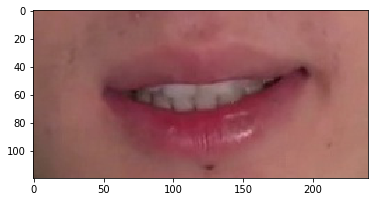

In [13]:
pred = show('/home/fesian/contest_workspace/chunyu/dataset/center_mouth_rgb/train/1b912134408f06cf5dd0758c447ee74e/')

In [11]:
preds[0]

array([[  -5.,   43.],
       [  -5.,   80.],
       [  -5.,  123.],
       [   1.,  160.],
       [  19.,  203.],
       [  44.,  234.],
       [  75.,  253.],
       [ 118.,  265.],
       [ 173.,  277.],
       [ 223.,  271.],
       [ 260.,  265.],
       [ 290.,  253.],
       [ 321.,  222.],
       [ 334.,  179.],
       [ 340.,  142.],
       [ 346.,  105.],
       [ 346.,   68.],
       [  13.,  -42.],
       [  38.,  -67.],
       [  68.,  -73.],
       [  99.,  -73.],
       [ 124.,  -67.],
       [ 241.,  -73.],
       [ 272.,  -73.],
       [ 297.,  -73.],
       [ 321.,  -61.],
       [ 334.,  -36.],
       [ 173.,  -36.],
       [ 173.,  -18.],
       [ 173.,    6.],
       [ 173.,   31.],
       [ 142.,   74.],
       [ 155.,   74.],
       [ 173.,   74.],
       [ 192.,   74.],
       [ 210.,   74.],
       [  56.,  -18.],
       [  75.,  -30.],
       [  99.,  -30.],
       [ 118.,  -18.],
       [  99.,  -18.],
       [  75.,  -18.],
       [ 241.,  -24.],
       [ 26

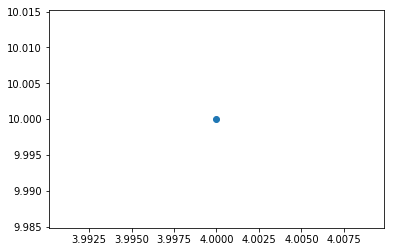

In [14]:
plt.scatter(4,10)

# 3D face alignment

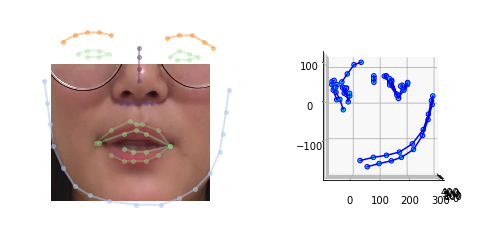

In [11]:
import face_alignment
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from skimage import io
import collections
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
%matplotlib inline


# Run the 3D face alignment on a test image, without CUDA.
fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._3D, flip_input=True)

try:
    input_img = io.imread('/home/fesian/contest_workspace/chunyu/dataset/lip_train/lip_train/c53f9ac9332ef0658dd5640118852b82/4.png')
except FileNotFoundError:
    input_img = io.imread('test/assets/aflw-test.jpg')

preds = fa.get_landmarks(input_img)[-1]

# 2D-Plot
plot_style = dict(marker='o',
                  markersize=4,
                  linestyle='-',
                  lw=2)

pred_type = collections.namedtuple('prediction_type', ['slice', 'color'])
pred_types = {'face': pred_type(slice(0, 17), (0.682, 0.780, 0.909, 0.5)),
              'eyebrow1': pred_type(slice(17, 22), (1.0, 0.498, 0.055, 0.4)),
              'eyebrow2': pred_type(slice(22, 27), (1.0, 0.498, 0.055, 0.4)),
              'nose': pred_type(slice(27, 31), (0.345, 0.239, 0.443, 0.4)),
              'nostril': pred_type(slice(31, 36), (0.345, 0.239, 0.443, 0.4)),
              'eye1': pred_type(slice(36, 42), (0.596, 0.875, 0.541, 0.3)),
              'eye2': pred_type(slice(42, 48), (0.596, 0.875, 0.541, 0.3)),
              'lips': pred_type(slice(48, 60), (0.596, 0.875, 0.541, 0.3)),
              'teeth': pred_type(slice(60, 68), (0.596, 0.875, 0.541, 0.4))
              }

fig = plt.figure(figsize=plt.figaspect(.5))
ax = fig.add_subplot(1, 2, 1)
ax.imshow(input_img)

for pred_type in pred_types.values():
    ax.plot(preds[pred_type.slice, 0],
            preds[pred_type.slice, 1],
            color=pred_type.color, **plot_style)

ax.axis('off')

# 3D-Plot
ax = fig.add_subplot(1, 2, 2, projection='3d')
surf = ax.scatter(preds[:, 0] * 1.2,
                  preds[:, 1],
                  preds[:, 2],
                  c='cyan',
                  alpha=1.0,
                  edgecolor='b')

for pred_type in pred_types.values():
    ax.plot3D(preds[pred_type.slice, 0] * 1.2,
              preds[pred_type.slice, 1],
              preds[pred_type.slice, 2], color='blue')

ax.view_init(elev=0., azim=0.)
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()